<a href="https://colab.research.google.com/github/harsh-kmr/Brain-Tumor-44-Classes/blob/main/Brain_Tumor_Type_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import and install

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import zipfile
import tensorflow as tf
import os
import numpy as np
import gdown
import shutil
import math
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## download dataset 

In [ ]:
directory = "/content/brain_tumor"
os.makedirs(directory)

In [ ]:
id = "1EdxItCK11ZsPSXTH3_lbzBCeA_7rBxsM"
output = "brain_tummor.zip"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EdxItCK11ZsPSXTH3_lbzBCeA_7rBxsM
To: /content/brain_tummor.zip
100%|██████████| 197M/197M [00:00<00:00, 256MB/s]


'brain_tummor.zip'

In [ ]:
path_to_downloaded_file = "/content/" + output

path_to_downloaded_file

'/content/brain_tummor.zip'

In [ ]:
with zipfile.ZipFile(path_to_downloaded_file, 'r') as zip_ref:
    zip_ref.extractall(directory)

In [ ]:
def count_image(ROOT_DIR):
  number_of_images = {}
  for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
  return number_of_images

In [ ]:
image_count = count_image("/content/brain_tumor")

In [ ]:
image_count.items()

dict_items([('Astrocitoma T1', 176), ('Granuloma T1', 30), ('_NORMAL T1', 251), ('Meduloblastoma T2', 41), ('Carcinoma T1', 66), ('Germinoma T2', 33), ('Ganglioglioma T1', 20), ('Schwannoma T1', 148), ('Papiloma T1C+', 108), ('Neurocitoma T1C+', 223), ('Meningioma T1', 272), ('Ependimoma T2', 57), ('Glioblastoma T2', 55), ('Ependimoma T1C+', 48), ('Tuberculoma T1', 28), ('Granuloma T2', 17), ('Glioblastoma T1', 55), ('Oligodendroglioma T1C+', 72), ('Schwannoma T2', 123), ('Carcinoma T2', 73), ('Papiloma T2', 63), ('Meduloblastoma T1C+', 67), ('Ganglioglioma T2', 23), ('_NORMAL T2', 271), ('Tuberculoma T1C+', 84), ('Neurocitoma T2', 104), ('Germinoma T1C+', 40), ('Meduloblastoma T1', 23), ('Neurocitoma T1', 130), ('Germinoma T1', 27), ('Astrocitoma T1C+', 233), ('Schwannoma T1C+', 194), ('Tuberculoma T2', 33), ('Oligodendroglioma T2', 66), ('Carcinoma T1C+', 112), ('Meningioma T2', 233), ('Glioblastoma T1C+', 94), ('Meningioma T1C+', 369), ('Ependimoma T1', 45), ('Astrocitoma T2', 171),

In [ ]:
total_images=0
for value in image_count.values():
  total_images += value

total_images

4479

In [ ]:
df = pd.DataFrame(list(image_count.items()), columns=['key', 'value'])

df = df.sort_values('value')

df.head()

,key,value
15,Granuloma T2,17
43,Ganglioglioma T1C+,18
6,Ganglioglioma T1,20
27,Meduloblastoma T1,23
22,Ganglioglioma T2,23


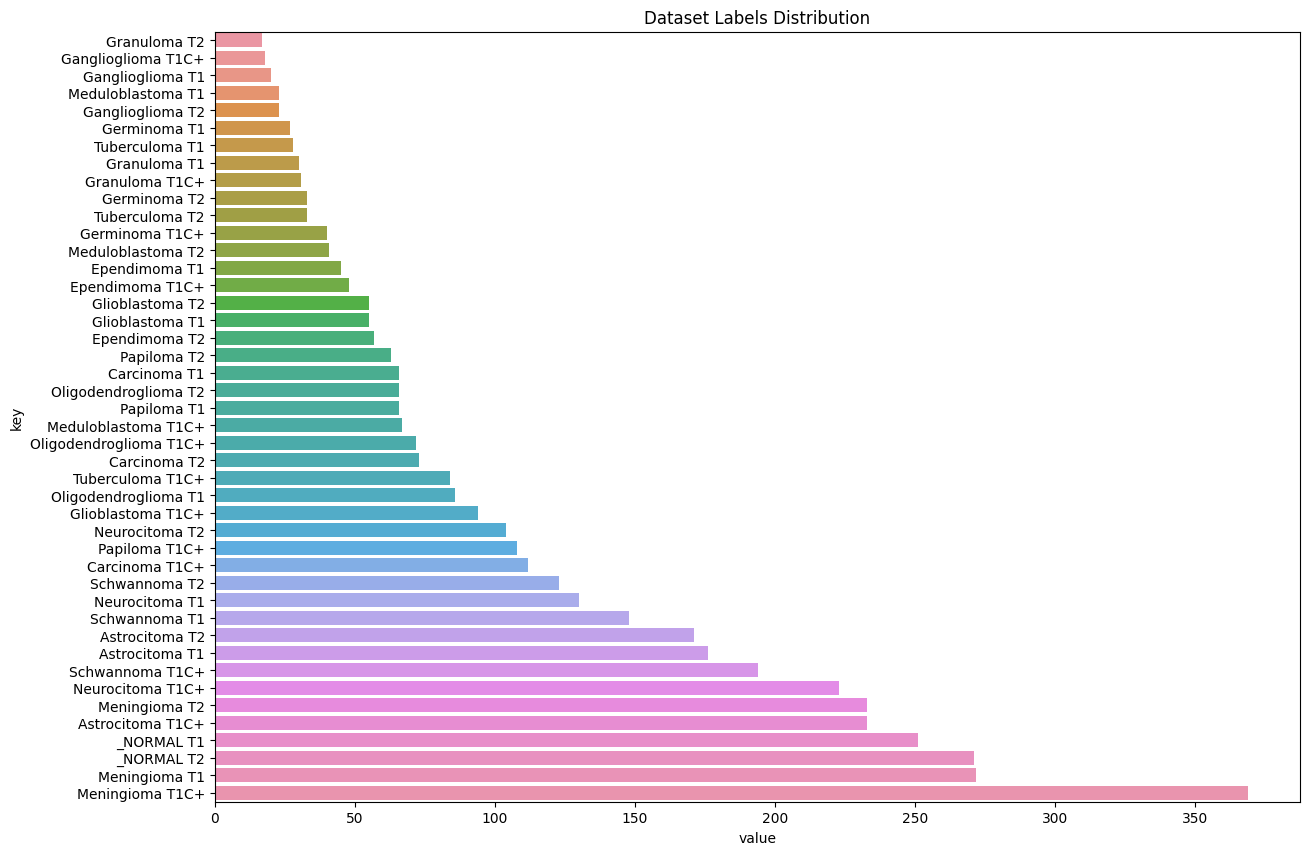

In [ ]:
fig = plt.figure(figsize=(14, 10))

# Plot Labels Distribution
plt.title('Dataset Labels Distribution')
sns.barplot(x='value',
            y='key',
            data = df,
            orient="h");

In [ ]:
Root_dir = "/content/brain_tumor"
for dir in os.listdir(Root_dir):
  folder_path = os.path.join(Root_dir, dir)
  number_of_images = len(os.listdir(folder_path))
  if number_of_images < 50:
    shutil.rmtree(folder_path)
    print(f"Deleted folder {dir}")


Deleted folder Granuloma T1
Deleted folder Meduloblastoma T2
Deleted folder Germinoma T2
Deleted folder Ganglioglioma T1
Deleted folder Ependimoma T1C+
Deleted folder Tuberculoma T1
Deleted folder Granuloma T2
Deleted folder Ganglioglioma T2
Deleted folder Germinoma T1C+
Deleted folder Meduloblastoma T1
Deleted folder Germinoma T1
Deleted folder Tuberculoma T2
Deleted folder Ependimoma T1
Deleted folder Granuloma T1C+
Deleted folder Ganglioglioma T1C+


In [ ]:
image_count = count_image("/content/brain_tumor")

In [ ]:
total_images=0
for value in image_count.values():
  total_images += value

total_images

4022

In [ ]:
df = pd.DataFrame(list(image_count.items()), columns=['key', 'value'])

df = df.sort_values('value')

df.head()

,key,value
8,Glioblastoma T2,55
9,Glioblastoma T1,55
7,Ependimoma T2,57
13,Papiloma T2,63
21,Oligodendroglioma T2,66


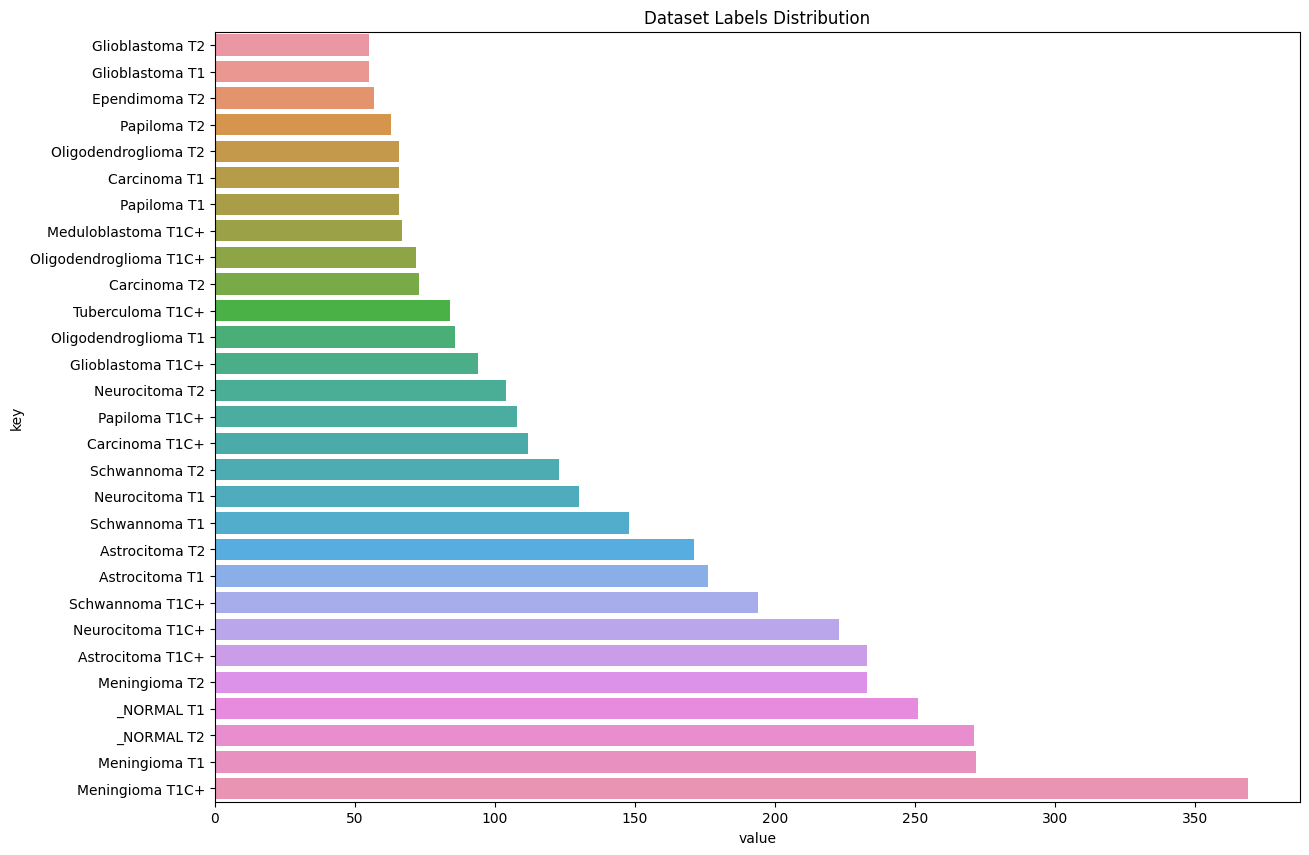

In [ ]:
fig = plt.figure(figsize=(14, 10))

# Plot Labels Distribution
plt.title('Dataset Labels Distribution')
sns.barplot(x='value',
            y='key',
            data = df,
            orient="h");

## divide the dataset

lets redivide it such that :


*   70% train
*   15% val
*   15 test



In [ ]:
ROOT_DIR = "/content/braintumor/"

os.makedirs(ROOT_DIR+"/train")
os.makedirs(ROOT_DIR+"/val")
os.makedirs(ROOT_DIR+"/test")

In [ ]:
for key in image_count.keys():
  os.makedirs(ROOT_DIR+"/test/"+key)
  os.makedirs(ROOT_DIR+"/train/"+key)
  os.makedirs(ROOT_DIR+"/val/"+key)

In [ ]:
test_count = {}
train_count = {}
for key in image_count.keys():
    test_count[key] = math.ceil(image_count[key] * 0.15)
    train_count[key] = image_count[key]- 2* test_count[key]

In [ ]:
test_count.items()

dict_items([('Astrocitoma T1', 27), ('_NORMAL T1', 38), ('Carcinoma T1', 10), ('Schwannoma T1', 23), ('Papiloma T1C+', 17), ('Neurocitoma T1C+', 34), ('Meningioma T1', 41), ('Ependimoma T2', 9), ('Glioblastoma T2', 9), ('Glioblastoma T1', 9), ('Oligodendroglioma T1C+', 11), ('Schwannoma T2', 19), ('Carcinoma T2', 11), ('Papiloma T2', 10), ('Meduloblastoma T1C+', 11), ('_NORMAL T2', 41), ('Tuberculoma T1C+', 13), ('Neurocitoma T2', 16), ('Neurocitoma T1', 20), ('Astrocitoma T1C+', 35), ('Schwannoma T1C+', 30), ('Oligodendroglioma T2', 10), ('Carcinoma T1C+', 17), ('Meningioma T2', 35), ('Glioblastoma T1C+', 15), ('Meningioma T1C+', 56), ('Astrocitoma T2', 26), ('Papiloma T1', 10), ('Oligodendroglioma T1', 13)])

In [ ]:
ROOT_DIR2 = "/content/brain_tumor"

In [ ]:
for key in test_count.keys():
    src_dir = os.path.join(ROOT_DIR2, key)
    dest_dir = os.path.join(ROOT_DIR, "test", key)
    images = os.listdir(src_dir)
    # Move 15% of the images from the train directory to the test directory
    for i in range(test_count[key]):
        img = images[i]
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)

    dest_dir = os.path.join(ROOT_DIR, "val", key)
    images = os.listdir(src_dir)
    for i in range(test_count[key]):
        img = images[i]
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)

    dest_dir = os.path.join(ROOT_DIR, "train", key)
    images = os.listdir(src_dir)
    for i in range(train_count[key]):
        img = images[i]
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)

## image

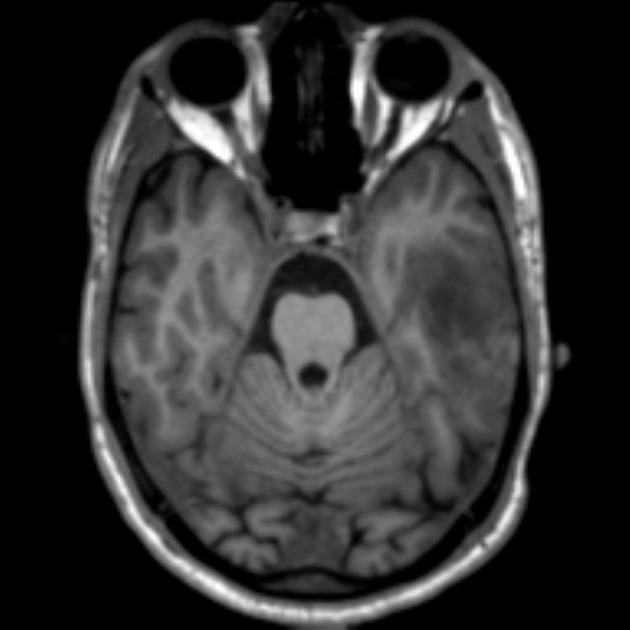

In [ ]:
from PIL import Image
img_path = "/content/braintumor/test/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg"

image = Image.open(img_path)

image.show()

In [ ]:
image = np.array(image)
image.shape

(630, 630)

In [ ]:
from PIL import Image

ROOT_DIR = "/content/braintumor"

min_width, min_height = float('inf'), float('inf')

for key in image_count.keys():
    for img_name in os.listdir(os.path.join(ROOT_DIR, "train", key)):
        img_path = os.path.join(ROOT_DIR, "train", key, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            min_width = min(min_width, width)
            min_height = min(min_height, height)

    for img_name in os.listdir(os.path.join(ROOT_DIR, "val", key)):
        img_path = os.path.join(ROOT_DIR, "val", key, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            min_width = min(min_width, width)
            min_height = min(min_height, height)

    for img_name in os.listdir(os.path.join(ROOT_DIR, "test", key)):
        img_path = os.path.join(ROOT_DIR, "test", key, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            min_width = min(min_width, width)
            min_height = min(min_height, height)

print("Minimum image size:", min_width, "x", min_height)


Minimum image size: 305 x 347


## preprocessing

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
Train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/train",
    label_mode= "categorical",
    seed = 42,
    color_mode= "rgb",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2790 files belonging to 29 classes.


In [ ]:
class_names = Train_ds.class_names
class_names

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Meduloblastoma T1C+',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1C+',
 '_NORMAL T1',
 '_NORMAL T2']

In [ ]:
len(Train_ds)

88

In [ ]:
Test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/test",
    label_mode= "categorical",
    seed = 42,
    color_mode= "rgb",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 615 files belonging to 29 classes.


In [ ]:
Val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/val",
    label_mode= "categorical",
    seed = 42,
    color_mode= "rgb",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 616 files belonging to 29 classes.


In [ ]:
for image_batch, label_batch in Train_ds.take(1):
  print(image_batch.shape) #batch,dimension,dimension,grayscale
  print(label_batch)

(32, 256, 256, 3)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

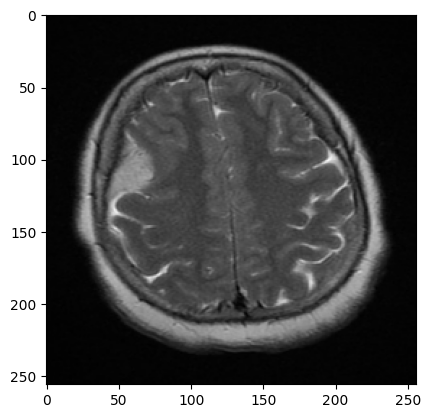

In [ ]:
image = image_batch[0].numpy().astype("uint8")
plt.imshow(image)
plt.show()

In [ ]:
print(image_batch[0].numpy().shape)

(256, 256, 3)


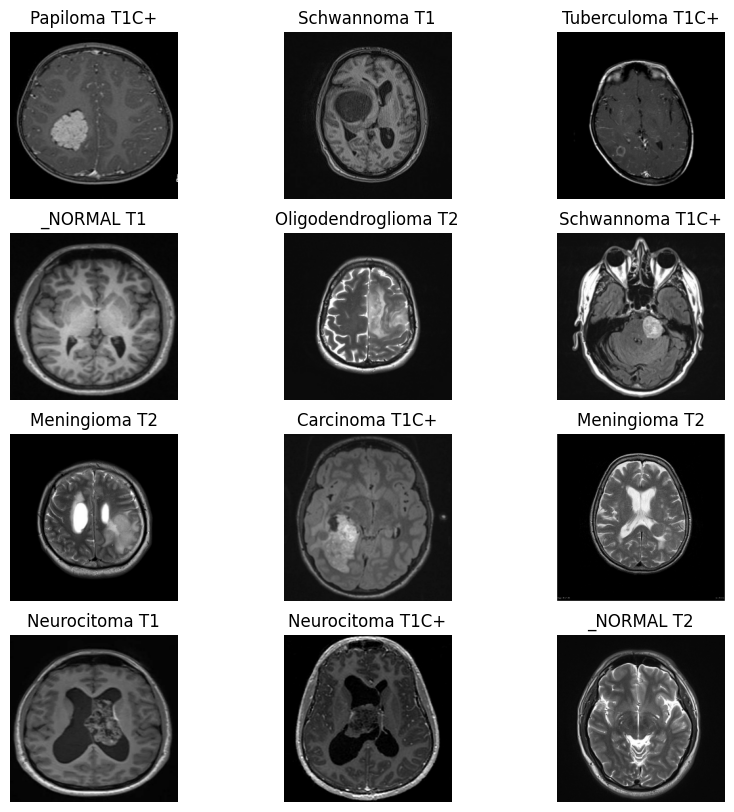

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in Train_ds.take(1):
  for i in range(12):
      ax = plt.subplot(4,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(label_batch[i])])
      plt.axis("off")

In [ ]:
Train_ds = Train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Val_ds = Val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Test_ds = Test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## build a *model*

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE,),
    keras.layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
output_shape = len(class_names)

In [ ]:
model = keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(filters= 16, kernel_size= (3,3), input_shape= input_shape, activation="relu" ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation="relu" ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters= 128, kernel_size= (3,3), activation="relu" ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(output_shape, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (32, 127, 127, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        4640      
                                                      

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.CategoricalCrossentropy(from_logits = False), metrics= ['accuracy'] )

In [ ]:
history = model.fit(
    Train_ds,
    batch_size = BATCH_SIZE,
    validation_data = Val_ds,
    verbose=1,
    epochs = 50
)

Epoch 1/50
88/88 [==============================] - 34s 87ms/step - loss: 3.3965 - accuracy: 0.0724 - val_loss: 3.2890 - val_accuracy: 0.0974
Epoch 2/50
88/88 [==============================] - 6s 64ms/step - loss: 3.2040 - accuracy: 0.0961 - val_loss: 3.1954 - val_accuracy: 0.0568
Epoch 3/50
88/88 [==============================] - 6s 64ms/step - loss: 3.0781 - accuracy: 0.1222 - val_loss: 3.0671 - val_accuracy: 0.1721
Epoch 4/50
88/88 [==============================] - 6s 68ms/step - loss: 2.8782 - accuracy: 0.1857 - val_loss: 2.9070 - val_accuracy: 0.1867
Epoch 5/50
88/88 [==============================] - 6s 64ms/step - loss: 2.6327 - accuracy: 0.2541 - val_loss: 2.7468 - val_accuracy: 0.2338
Epoch 6/50
88/88 [==============================] - 6s 65ms/step - loss: 2.4133 - accuracy: 0.3118 - val_loss: 2.4183 - val_accuracy: 0.3003
Epoch 7/50
88/88 [==============================] - 6s 63ms/step - loss: 2.1889 - accuracy: 0.3595 - val_loss: 2.2533 - val_accuracy: 0.3101
Epoch 8/50
8

In [ ]:
scores = model.evaluate(Test_ds)

20/20 [==============================] - 3s 28ms/step - loss: 0.6874 - accuracy: 0.7951


In [ ]:
scores

[0.6873704195022583, 0.795121967792511]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

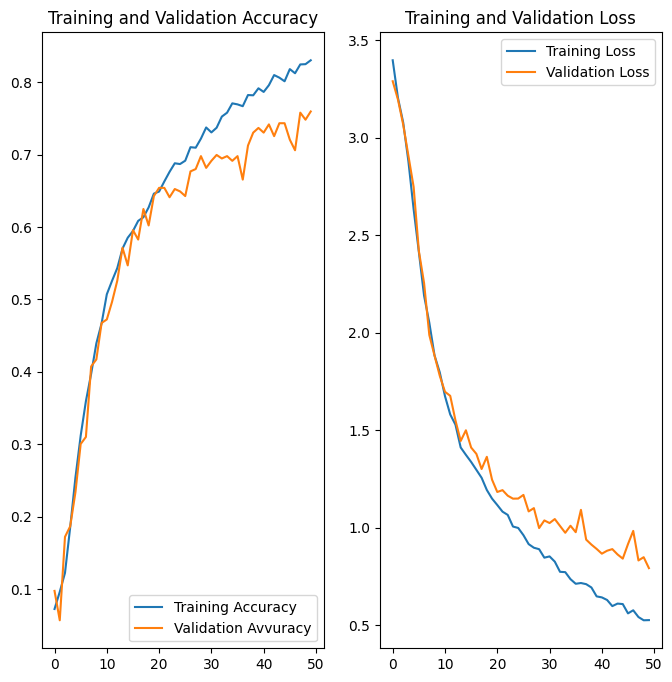

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label = 'Training Accuracy')
plt.plot(range(50), val_acc, label = 'Validation Avvuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50), loss, label = 'Training Loss')
plt.plot(range(50), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

first image to predict
first image's actual label: Carcinoma T1C+
1/1 [==============================] - 0s 122ms/step
first image's Predicted label: Carcinoma T1C+


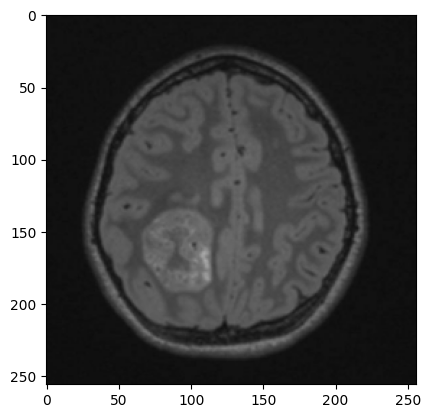

In [ ]:
for images_batch, labels_batch in Test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print("first image's actual label:",class_names[np.argmax(first_label)])

  batch_prediction = model.predict(images_batch)
  print("first image's Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


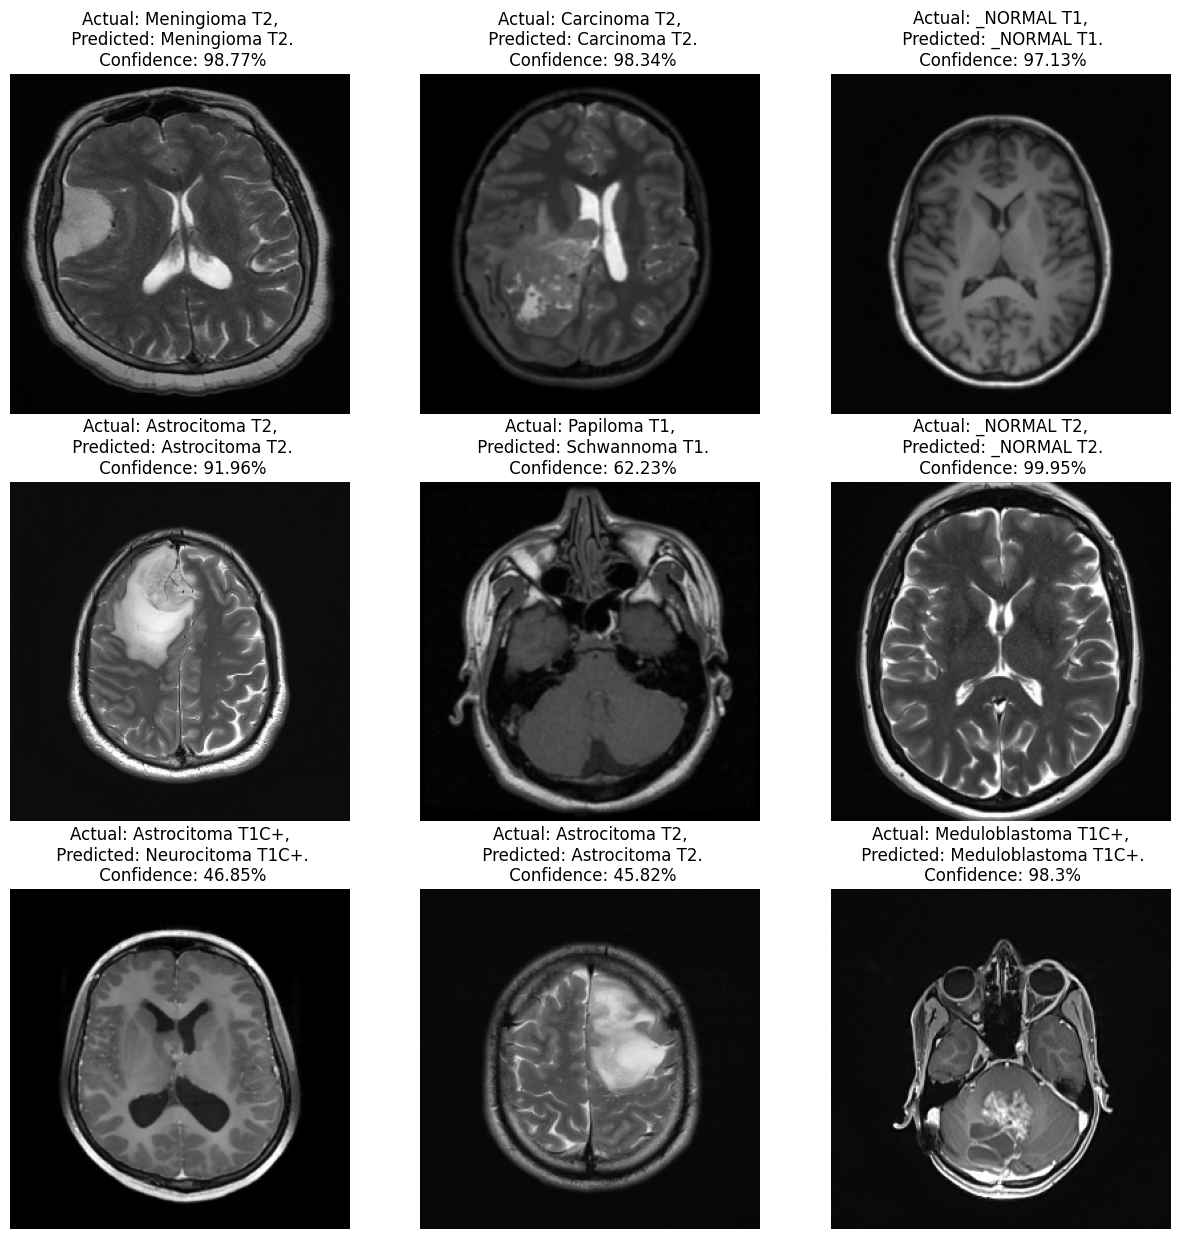

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in Test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

##transfer learning

In [ ]:
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE= 32

In [ ]:
Train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/train",
    label_mode= "categorical",
    seed = 42,
    color_mode= "rgb",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2790 files belonging to 29 classes.


In [ ]:
Test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/test",
    label_mode= "categorical",
    seed = 42,
    color_mode= "rgb",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 615 files belonging to 29 classes.


In [ ]:
Val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/braintumor/val",
    label_mode= "categorical",
    seed = 42,
    color_mode= "rgb",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 616 files belonging to 29 classes.


In [ ]:
class_names = Train_ds.class_names
class_names

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Meduloblastoma T1C+',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1C+',
 '_NORMAL T1',
 '_NORMAL T2']

In [ ]:
output_shape = len(class_names)

In [ ]:
Train_ds = Train_ds.map(lambda x, y: (preprocess_input(x), y))
Val_ds = Val_ds.map(lambda x, y: (preprocess_input(x), y))
Test_ds = Test_ds.map(lambda x, y: (preprocess_input(x), y))

In [ ]:
Train_ds = Train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Val_ds = Val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Test_ds = Test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
base_model =  MobileNet(input_shape =  (224, 224,3), include_top =  False)


17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = keras.layers.Flatten()(base_model.output)
X = keras.layers.Dense(output_shape, activation="softmax")(X)

model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.CategoricalCrossentropy(from_logits = False), metrics= ['accuracy'] )

In [ ]:
history = model.fit(
    Train_ds,
    batch_size = BATCH_SIZE,
    validation_data = Val_ds,
    verbose=1,
    epochs = 15
)

Epoch 1/15
88/88 [==============================] - 28s 66ms/step - loss: 7.5076 - accuracy: 0.5867 - val_loss: 3.4120 - val_accuracy: 0.7240
Epoch 2/15
88/88 [==============================] - 4s 44ms/step - loss: 1.0562 - accuracy: 0.9039 - val_loss: 2.1179 - val_accuracy: 0.8214
Epoch 3/15
88/88 [==============================] - 4s 42ms/step - loss: 0.4974 - accuracy: 0.9498 - val_loss: 3.9389 - val_accuracy: 0.7630
Epoch 4/15
88/88 [==============================] - 4s 42ms/step - loss: 0.7704 - accuracy: 0.9409 - val_loss: 2.1144 - val_accuracy: 0.8442
Epoch 5/15
88/88 [==============================] - 4s 44ms/step - loss: 0.4649 - accuracy: 0.9706 - val_loss: 1.5344 - val_accuracy: 0.8766
Epoch 6/15
88/88 [==============================] - 4s 43ms/step - loss: 0.2409 - accuracy: 0.9824 - val_loss: 1.6975 - val_accuracy: 0.8847
Epoch 7/15
88/88 [==============================] - 4s 43ms/step - loss: 0.4296 - accuracy: 0.9738 - val_loss: 2.5695 - val_accuracy: 0.8458
Epoch 8/15
8

In [ ]:
scores = model.evaluate(Test_ds)

20/20 [==============================] - 2s 46ms/step - loss: 3.0368 - accuracy: 0.8732


In [ ]:
scores

[3.0368332862854004, 0.8731707334518433]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

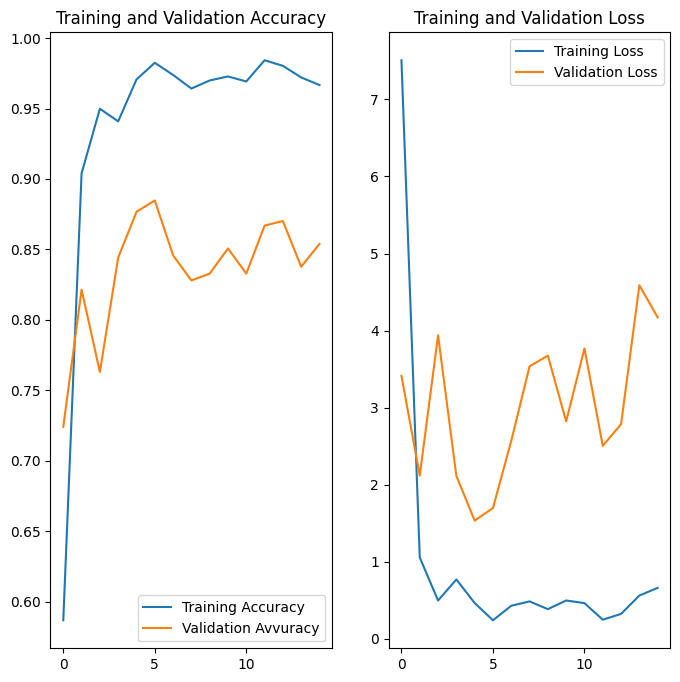

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(15), acc, label = 'Training Accuracy')
plt.plot(range(15), val_acc, label = 'Validation Avvuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(15), loss, label = 'Training Loss')
plt.plot(range(15), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')